Job Describtion Skills Extraction

Team Member:
1.  Voramate Plodprong               6310422028
2.  Suphanat Thaiprasit                6310422034
3.  Rakchanok Thongkumpan        6310422039
4.  Varattaya Rojanarachneekorn   6310422044
5.  Piyaboon Kunakornjittirak        6310422047

# Import Library

In [1]:
# Import WordCloud for Visualize
!pip install WordCloud

In [2]:
!pip install spacy
#python -m spacy download en

In [ ]:
! pip install pyLDAvis

In [4]:
!pip install openpyxl==3

     |████████████████████████████████| 172 kB 8.4 MB/s 
  Created wheel for openpyxl: filename=openpyxl-3.0.0-py2.py3-none-any.whl size=241208 sha256=19b059f8049ba360ae176547f31c251c1cc63b4479d7e8e77a061aa7c8d70742
  Stored in directory: /root/.cache/pip/wheels/c7/64/ff/ce98f6e1d2701ae8e216c875da62feed2839ac8a3cae0ab8af
Successfully built openpyxl
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 2.5.9
    Uninstalling openpyxl-2.5.9:
      Successfully uninstalled openpyxl-2.5.9


In [5]:
#Basic lib
import numpy as np
import pandas as pd

#Gensim
import gensim
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import gensim.corpora as corpora

#NLTK
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
import nltk
import re
nltk.download('all')
nltk.download('stopwords')

# Import the wordcloud library
from wordcloud import WordCloud

# spacy for lemmatization
import spacy

# For vistualize LDA result
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [6]:
import pickle 
import os

from pprint import pprint

import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [7]:
# Read and show data
df = pd.read_excel('/content/sample_data/10job.xlsx')
df.head()

/usr/local/lib/python3.7/dist-packages/openpyxl/compat/numbers.py:41: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  numpy.float,
/usr/local/lib/python3.7/dist-packages/openpyxl/xml/functions.py:29: DeprecationWarning: defusedxml.cElementTree is deprecated, import from defusedxml.ElementTree instead.
  from defusedxml.cElementTree import iterparse
/usr/local/lib/python3.7/dist-packages/openpyxl/xml/functions.py:30: DeprecationWarning: defusedxml.lxml is no longer supported and will be removed in a future release.
  from defusedxml.lxml import fromstring as _fromstring, tostring


group  ...                                    FullDescription
0  Business development  ...  Our client has an exciting opportunity for a n...
1  Business development  ...  New Business Sales Specialist to work for our ...
2  Business development  ...  BUSINESS DEVELOPMENT MANAGER SUPPLY CHAIN Hert...
3  Business development  ...  Business Development  Full Time  Temp to Perm ...
4  Business development  ...  An up and coming Search agency is in need of a...

[5 rows x 3 columns]

# Data Preparation

In [8]:
# Virtualze frequency word for extend stopword list
 
# Join the different processed titles together.
long_string = ','.join(list(str(df.FullDescription.values)))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

ValueError: ignored

In [9]:
#Function for prepare data
stop_words = stopwords.words('english')
stop_words.extend(['work', 'role', 'project', 'skill', 'client' ,'experience' ,'opportunity','candidate','job','application','include','page','recieve','embed','new','look','www'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

# def make_trigrams(texts):
#     return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [10]:
#To list
data = df.FullDescription.to_list()

# Remove Puncuation
data = [re.sub('[,\.!?]', '',str(sent)) for sent in data]

# Tokenized word
data_words = list(sent_to_words(data))
print(data_words[:1])

<input>:5: DeprecationWarning: invalid escape sequence \.
<input>:5: DeprecationWarning: invalid escape sequence \.
<input>:5: DeprecationWarning: invalid escape sequence \.
<input>:5: DeprecationWarning: invalid escape sequence \.
<input>:5: DeprecationWarning: invalid escape sequence \.
<ipython-input-10-d5d5b79dbe9d>:5: DeprecationWarning: invalid escape sequence \.
  data = [re.sub('[,\.!?]', '',str(sent)) for sent in data]


[['our', 'client', 'has', 'an', 'exciting', 'opportunity', 'for', 'new', 'business', 'development', 'and', 'sales', 'executive', 'to', 'be', 'based', 'at', 'their', 'south', 'warrington', 'office', 'paying', 'with', 'an', 'ote', 'of', 'they', 'are', 'european', 'based', 'brand', 'development', 'sales', 'and', 'marketing', 'company', 'specialising', 'in', 'creative', 'solutions', 'and', 'brand', 'representation', 'throughout', 'the', 'emea', 'territory', 'the', 'business', 'development', 'and', 'sales', 'executive', 'will', 'have', 'the', 'desire', 'and', 'passion', 'to', 'join', 'their', 'team', 'who', 'focus', 'on', 'products', 'and', 'services', 'within', 'the', 'sports', 'lifestyle', 'and', 'golf', 'industry', 'this', 'position', 'would', 'suit', 'candidate', 'who', 'has', 'proven', 'experience', 'with', 'recent', 'sales', 'or', 'telesales', 'experience', 'and', 'is', 'looking', 'for', 'an', 'opportunity', 'to', 'work', 'within', 'lifestyle', 'environment', 'being', 'the', 'main', '

In [11]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['our', 'client', 'has', 'an', 'exciting', 'opportunity', 'for', 'new', 'business', 'development', 'and', 'sales', 'executive', 'to', 'be', 'based', 'at', 'their', 'south', 'warrington', 'office', 'paying', 'with', 'an', 'ote', 'of', 'they', 'are', 'european', 'based', 'brand', 'development', 'sales', 'and', 'marketing', 'company', 'specialising', 'in', 'creative', 'solutions', 'and', 'brand', 'representation', 'throughout', 'the', 'emea', 'territory', 'the', 'business', 'development', 'and', 'sales', 'executive', 'will', 'have', 'the', 'desire', 'and', 'passion', 'to', 'join', 'their', 'team', 'who', 'focus', 'on', 'products', 'and', 'services', 'within', 'the', 'sports', 'lifestyle', 'and', 'golf', 'industry', 'this', 'position', 'would', 'suit', 'candidate', 'who', 'has', 'proven', 'experience', 'with', 'recent', 'sales', 'or', 'telesales', 'experience', 'and', 'is', 'looking', 'for', 'an', 'opportunity', 'to', 'work', 'within', 'lifestyle', 'environment', 'being', 'the', 'main', 'c

In [12]:
# remove stop words
data_words = remove_stopwords(data_words)

# Form Bigrams
#data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model for POS tagging component
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning

[['exciting', 'business', 'development', 'sale', 'executive', 'base', 'office', 'pay', 'ote', 'base', 'brand', 'development', 'sale', 'marketing', 'company', 'specialise', 'creative', 'solution', 'brand', 'representation', 'territory', 'business', 'development', 'sale', 'executive', 'desire', 'passion', 'join', 'team', 'focus', 'product', 'service', 'sport', 'lifestyle', 'golf', 'industry', 'position', 'would', 'suit', 'prove', 'recent', 'sale', 'telesale', 'look', 'lifestyle', 'environment', 'main', 'coordinator', 'support', 'agency', 'sale', 'team', 'business', 'development', 'sale', 'executive', 'nee', 'passionate', 'grow', 'brand', 'portfolio', 'maximise', 'sale', 'create', 'last', 'impression', 'customer', 'sponsor', 'athlete', 'field', 'business', 'development', 'sale', 'executive', 'duty', 'manage', 'establish', 'customer', 'base', 'well', 'provide', 'effective', 'communication', 'exist', 'customer', 'motivate', 'sale', 'improve', 'proactively', 'build', 'relationship', 'maximis

/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use sele

# LDA Model (n_topics = 10)

## Build LDA Model

In [13]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 2), (3, 2), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 5), (12, 3), (13, 1), (14, 1), (15, 13), (16, 1), (17, 3), (18, 2), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 5), (25, 1), (26, 2), (27, 12), (28, 1), (29, 1)]


In [ ]:
# Readable format of corpus (term-frequency)
#[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

In [15]:
# number of topics
num_topics = 10
# Build LDA model
lda_model_4 = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics,
                                       random_state=100,
                                       eval_every=1,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.s

In [16]:
# Print the Keyword in the 10 topics
pprint(lda_model_4.print_topics())
doc_lda = lda_model_4[corpus]

[(0,
  '0.057*"sale" + 0.040*"software" + 0.036*"business" + 0.028*"manager" + '
  '0.023*"solution" + 0.022*"account" + 0.021*"service" + 0.020*"logistic" + '
  '0.019*"management" + 0.015*"consultant"'),
 (1,
  '0.027*"business" + 0.021*"team" + 0.020*"management" + 0.015*"lead" + '
  '0.012*"manager" + 0.012*"manage" + 0.011*"development" + 0.011*"skill" + '
  '0.010*"process" + 0.010*"implementation"'),
 (2,
  '0.065*"developer" + 0.062*"software" + 0.034*"development" + 0.029*"web" + '
  '0.025*"technology" + 0.023*"net" + 0.020*"skill" + 0.016*"agile" + '
  '0.013*"use" + 0.013*"team"'),
 (3,
  '0.020*"company" + 0.014*"team" + 0.013*"look" + 0.012*"work" + '
  '0.011*"excellent" + 0.011*"successful" + 0.011*"career" + 0.011*"base" + '
  '0.010*"skill" + 0.010*"apply"'),
 (4,
  '0.056*"analyst" + 0.040*"application" + 0.032*"group" + 0.029*"applicant" + '
  '0.026*"datum" + 0.019*"employment" + 0.015*"volume" + 0.013*"age" + '
  '0.013*"advertise" + 0.013*"receive"'),
 (5,
  '0.1

## LDA Vistualization

In [17]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis_4 = pyLDAvis.gensim_models.prepare(lda_model_4, corpus, id2word)
vis_4

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.142766  0.046104       1        1  26.853959
1      0.167387  0.025734       2        1  18.826498
8      0.105037  0.069889       3        1  14.054531
0      0.114377 -0.005760       4        1  12.541105
5      0.138844 -0.179352       5        1   9.395857
2      0.144164 -0.159885       6        1   6.878158
7     -0.101411  0.244143       7        1   4.488748
4     -0.075370  0.210098       8        1   3.803844
6     -0.240927 -0.182709       9        1   2.269035
9     -0.394866 -0.068261      10        1   0.888265, topic_info=            Term          Freq         Total Category  logprob  loglift
657     software  47046.000000  47046.000000  Default  30.0000  30.0000
109         sale  16111.000000  16111.000000  Default  29.0000  29.0000
281    developer  10086.000000  10086.000000  Default  28.0000  28.0000
262       supply  20036.000000  20036.000000  Default  27.0000  27.0000
1326    engineer  10382.000000  10382.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
3197      charge    125.807151    126.854947  Topic10  -5.0772   4.7154
9291    helpdesk    111.784452    112.832261  Topic10  -5.1954   4.7143
2331    merchant    101.934842    102.983491  Topic10  -5.2876   4.7134
1508     payment    256.604456    484.735909  Topic10  -4.3644   4.0876
297   processing    247.003084    569.664107  Topic10  -4.4026   3.8880

[645 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
0         1  0.157291  ability
0         2  0.545346  ability
0         3  0.235406  ability
0         4  0.059283  ability
0         6  0.002652  ability
...     ...       ...      ...
137       5  0.225637    would
137       6  0.039042    would
369       2  0.129405    write
369       3  0.513662    write
369       6  0.356160    write

[1189 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 9, 1, 6, 3, 8, 5, 7, 10])

## Calculate Perpexity Score

In [19]:
# Compute Perplexity
print('\nPerplexity: ', lda_model_4.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda_4 = CoherenceModel(model=lda_model_4, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda_4 = coherence_model_lda_4.get_coherence()
print('\nCoherence Score: ', coherence_lda_4)

เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.s


Perplexity:  -7.2009854157964615

Coherence Score:  0.4259020075325949


# Compute Coherence Values
How many topics must we have to promote better Coherence score.
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics


In [20]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaMulticore(corpus=corpus,id2word=id2word,num_topics=10,random_state=100,
                                       eval_every=1,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [32]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)

เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.s

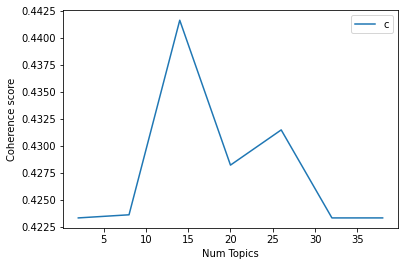

In [33]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# LDA Model (n_topics = 15)

In [23]:
# number of topics
num_topics = 15
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics,
                                       random_state=100,
                                       eval_every=1,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.s

In [24]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.069*"sale" + 0.039*"business" + 0.028*"solution" + 0.026*"manager" + '
  '0.026*"account" + 0.022*"software" + 0.022*"service" + 0.021*"consultant" + '
  '0.017*"management" + 0.016*"client"'),
 (1,
  '0.045*"application" + 0.042*"advertise" + 0.034*"receive" + 0.027*"day" + '
  '0.025*"volume" + 0.024*"overseas" + 0.023*"high" + 0.022*"lead" + '
  '0.022*"cast" + 0.021*"select"'),
 (2,
  '0.044*"business" + 0.026*"manager" + 0.025*"embed" + 0.024*"management" + '
  '0.021*"lead" + 0.019*"team" + 0.016*"manage" + 0.014*"development" + '
  '0.013*"implementation" + 0.011*"project"'),
 (3,
  '0.025*"skill" + 0.023*"developer" + 0.021*"work" + 0.019*"team" + '
  '0.014*"excellent" + 0.013*"base" + 0.012*"would" + 0.012*"require" + '
  '0.011*"company" + 0.011*"look"'),
 (4,
  '0.041*"employment" + 0.033*"supply" + 0.024*"business" + 0.021*"applicant" '
  '+ 0.021*"group" + 0.018*"agency" + 0.017*"recruitment" + 0.015*"datum" + '
  '0.013*"financial" + 0.013*"opportunity"'),
 (5,

In [25]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.192581  0.088912       1        1  24.560776
8     -0.178813 -0.045994       2        1  15.140587
0     -0.191646  0.012022       3        1  11.900589
2     -0.237084 -0.026248       4        1  11.381723
10    -0.157307  0.112945       5        1   7.783589
14    -0.090439 -0.268043       6        1   6.783400
4     -0.026518  0.093750       7        1   5.397028
11     0.068368  0.147857       8        1   3.151028
7      0.096204  0.141491       9        1   2.842782
12    -0.022718 -0.248574      10        1   2.683293
13     0.128861  0.206140      11        1   2.510006
9      0.204028 -0.183537      12        1   1.772282
1      0.095430  0.028251      13        1   1.604292
5      0.210098  0.033857      14        1   1.538546
6      0.294118 -0.092829      15        1   0.950079, topic_info=               Term          Freq         Total Category  logprob  loglift
657        software  37418.000000  37418.000000  Default  30.0000  30.0000
109            sale  18702.000000  18702.000000  Default  29.0000  29.0000
2315           test   8383.000000   8383.000000  Default  28.0000  28.0000
1326       engineer  10784.000000  10784.000000  Default  27.0000  27.0000
262          supply  19242.000000  19242.000000  Default  26.0000  26.0000
...             ...           ...           ...      ...      ...      ...
2373      warehouse    644.001011   1292.108621  Topic15  -3.5116   3.9600
1768         finish    227.377368    366.664397  Topic15  -4.5526   4.1785
732   manufacturing    407.123877   1476.448696  Topic15  -3.9701   3.3681
932     maintenance    248.600360   1158.013287  Topic15  -4.4634   3.1178
1390       facility    178.807224    775.965015  Topic15  -4.7929   3.1886

[908 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
0         1  0.336951  ability
0         2  0.345525  ability
0         3  0.108723  ability
0         4  0.208744  ability
1         1  0.544380     able
...     ...       ...      ...
418       6  0.029931     year
418       7  0.000158     year
418       8  0.002692     year
418       9  0.089319     year
418      11  0.014728     year

[1768 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 9, 1, 3, 11, 15, 5, 12, 8, 13, 14, 10, 2, 6, 7])

In [26]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.s


Perplexity:  -7.255322004020168

Coherence Score:  0.44200769178040933


# LDA Model with Bigram (n_topics = 10)

In [27]:
# Form Bigrams
data_words_bigrams = make_bigrams(data_words)

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized_2 = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized_2[:1])

เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning

[['exciting', 'business', 'development', 'sale', 'executive', 'base', 'office', 'pay', 'ote', 'base', 'brand', 'development', 'sale', 'marketing', 'company', 'specialise', 'creative', 'solution', 'brand', 'representation', 'territory', 'business', 'development', 'sale', 'executive', 'desire', 'passion', 'join', 'team', 'focus', 'product', 'service', 'sport', 'lifestyle', 'golf', 'industry', 'position', 'would', 'suit', 'prove', 'recent', 'sale', 'telesale', 'look', 'lifestyle', 'environment', 'main', 'coordinator', 'support', 'agency', 'sale', 'team', 'business', 'development', 'sale', 'executive', 'nee', 'passionate', 'grow', 'brand', 'portfolio', 'maximise', 'sale', 'create', 'last', 'impression', 'customer', 'sponsor', 'athlete', 'field', 'business', 'development', 'sale', 'executive', 'duty', 'manage', 'establish', 'customer', 'base', 'well', 'provide', 'effective', 'communication', 'exist', 'customer', 'motivate', 'sale', 'improve', 'proactively', 'build', 'relationship', 'maximis

/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use sele

In [28]:
# Bigram LDA #

# Create Dictionary
id2word_2 = corpora.Dictionary(data_lemmatized_2)
# Create Corpus
texts_2 = data_lemmatized_2
# Term Document Frequency
corpus_2 = [id2word.doc2bow(text) for text in texts]
# View
print(corpus_2[:1][0][:30])

[(0, 1), (1, 1), (2, 2), (3, 2), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 5), (12, 3), (13, 1), (14, 1), (15, 13), (16, 1), (17, 3), (18, 2), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 5), (25, 1), (26, 2), (27, 12), (28, 1), (29, 1)]


In [29]:
# Build LDA model
lda_model_3 = gensim.models.LdaMulticore(corpus=corpus_2,
                                       id2word=id2word_2,
                                       num_topics=15)

# Print the Keyword in the 10 topics
pprint(lda_model_3.print_topics())
doc_lda = lda_model_3[corpus_2]

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

[(0,
  '0.013*"amazing" + 0.013*"company" + 0.010*"vacancy" + 0.009*"time" + '
  '0.009*"learner" + 0.008*"result" + 0.008*"direct" + 0.008*"deal_size" + '
  '0.007*"sponsor" + 0.007*"full"'),
 (1,
  '0.015*"medium" + 0.012*"expert" + 0.012*"time" + 0.012*"pipeline" + '
  '0.011*"desire" + 0.010*"business" + 0.010*"coldcalle" + 0.009*"servicesyou" '
  '+ 0.008*"sponsor" + 0.008*"maximise"'),
 (2,
  '0.018*"serviced_apartment" + 0.010*"solution" + 0.009*"season" + '
  '0.009*"feed" + 0.008*"reward" + 0.008*"sponsor" + 0.008*"responsibilite" + '
  '0.007*"postholder" + 0.007*"business" + 0.007*"representation"'),
 (3,
  '0.020*"serviced_apartment" + 0.017*"promotional" + 0.015*"telephone" + '
  '0.013*"direct" + 0.012*"vacancy" + 0.010*"company" + 0.009*"evaluation" + '
  '0.008*"full" + 0.008*"learner" + 0.008*"time"'),
 (4,
  '0.050*"serviced_apartment" + 0.022*"sponsor" + 0.018*"hospitality" + '
  '0.012*"time" + 0.009*"postholder" + 0.009*"full" + 0.008*"season" + '
  '0.008*"learner

In [30]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis_3 = pyLDAvis.gensim_models.prepare(lda_model_3, corpus_2, id2word_2)
vis_3

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.011445  0.020947       1        1  23.436069
5     -0.085182 -0.008474       2        1  11.997550
7     -0.035242 -0.058379       3        1   7.535124
11    -0.080678  0.073895       4        1   6.769634
1     -0.090412 -0.043870       5        1   6.693378
9      0.053873 -0.042351       6        1   6.539557
6      0.028025 -0.031410       7        1   6.402027
2      0.009487  0.047035       8        1   5.626141
13     0.024417  0.005274       9        1   5.225436
10     0.067371  0.006866      10        1   5.040687
14    -0.036668 -0.015606      11        1   4.848655
3      0.037143 -0.001478      12        1   2.774005
12    -0.001175  0.034267      13        1   2.498043
4      0.049987 -0.003781      14        1   2.333087
0      0.047609  0.017065      15        1   2.280605, topic_info=                    Term          Freq         Total Category  logprob  loglift
657   serviced_apartment  51755.000000  51755.000000  Default  30.0000  30.0000
262            coldcalle  13121.000000  13121.000000  Default  29.0000  29.0000
281               result  10405.000000  10405.000000  Default  28.0000  28.0000
115              sponsor  20861.000000  20861.000000  Default  27.0000  27.0000
1326             learner  12559.000000  12559.000000  Default  26.0000  26.0000
...                  ...           ...           ...      ...      ...      ...
93           proactively    198.249052   7376.492171  Topic15  -5.5654   0.1642
97           promotional    200.589129  11557.074688  Topic15  -5.5536  -0.2731
662          territorial    190.496823   7344.464283  Topic15  -5.6053   0.1287
165         professional    194.419305  13758.894162  Topic15  -5.5849  -0.4787
26           development    189.700121  12887.032438  Topic15  -5.6095  -0.4378

[1342 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
0          1  0.218976  ability
0          2  0.145027  ability
0          3  0.131594  ability
0          4  0.052951  ability
0          5  0.041995  ability
...      ...       ...      ...
11850      3  0.844507     œthe
11850      6  0.071873     œthe
11850      7  0.053905     œthe
9026       9  0.245907   œthink
9026      10  0.706982   œthink

[6283 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 6, 8, 12, 2, 10, 7, 3, 14, 11, 15, 4, 13, 5, 1])

In [31]:
# Compute Perplexity
print('\nPerplexity: ', lda_model_3.log_perplexity(corpus_2))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda_3 = CoherenceModel(model=lda_model_3, texts=data_lemmatized_2, dictionary=id2word_2, coherence='c_v')
coherence_lda_3 = coherence_model_lda_3.get_coherence()
print('\nCoherence Score: ', coherence_lda_3)

เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.s


Perplexity:  -7.1333374357743

Coherence Score:  0.29823965354987636
